<a href="https://colab.research.google.com/github/robonesky/oreilly/blob/main/RM%20Lab%20Notes%2011%20202301%20cohort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, roc_curve# , ROCCurveDisplay #, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, auc
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings ('ignore')

In [ ]:
df = pd.read_csv('./spy.csv', index_col=0, parse_dates=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-05-08,63.671875,64.781250,63.078125,64.781250,41.272911,1694700
1996-05-09,64.562500,65.062500,64.500000,64.734375,41.243053,593400
1996-05-10,65.375000,65.593750,65.062500,65.375000,41.651173,925100
1996-05-13,65.531250,66.640625,65.468750,66.359375,42.278339,867500
1996-05-14,66.625000,66.937500,66.562500,66.765625,42.537167,632300


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6293.000000,6293.000000,6293.000000,6293.000000,6293.000000,6.293000e+03
mean,159.373806,160.332798,158.308242,159.373042,133.292492,9.558396e+07
std,71.731954,71.996933,71.438268,71.748354,79.402662,9.699401e+07
min,61.937500,63.187500,60.375000,62.656250,40.130543,2.016000e+05
25%,112.019997,112.599998,111.156250,111.889999,80.180862,2.772080e+07
50%,133.125000,133.875000,132.156250,133.156250,98.580070,6.903300e+07
75%,200.020004,201.000000,198.740005,200.020004,177.175781,1.323469e+08
max,420.320007,422.820007,419.160004,422.119995,422.119995,8.710263e+08


In [ ]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df['O-C'] = df['Open'] - df['Close']
df['H-L'] = df['High'] - df['Low']

# This returns an ndarray
X = df[
    ['O-C', 'H-L']
].values

In [ ]:
y = np.where(
    # where T+1 > 0.995* T, populate an 'up', else a 'close'
    df['Adj Close'].shift(-1) > 0.995*df['Adj Close'],
    1,
    -1)

y

array([ 1,  1,  1, ...,  1,  1, -1])

In [ ]:
pd.Series(y).value_counts()

 1    4755
-1    1538
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False)

print(f'\nX_train is {X_train}, \nX_test is {X_test}, \ny_train is {y_train}, \ny_test is {y_test}')


X_train is [[-1.109375    1.703125  ]
 [-0.171875    0.5625    ]
 [ 0.          0.53125   ]
 ...
 [-0.01998901  1.43000793]
 [ 0.58999634  1.50999451]
 [-1.66000366  1.88999939]], 
X_test is [[-0.31999207  1.03999329]
 [-1.72999573  1.83000183]
 [ 1.41000366  2.03999329]
 ...
 [ 1.63000488  2.48001099]
 [-3.24002075  5.52999878]
 [-2.22998047  3.66000366]], 
y_train is [1 1 1 ... 1 1 1], 
y_test is [ 1 -1  1 ...  1  1 -1]


In [ ]:
model = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', KNeighborsClassifier())
])

model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [ ]:
y_pred = model.predict(X_test)

y_proba = model.predict_proba(X_test)

acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

print(f'Train Accuracy: {acc_train:0.4}, Test Accuracy: {acc_test:0.4}')

Train Accuracy: 0.7757, Test Accuracy: 0.7284


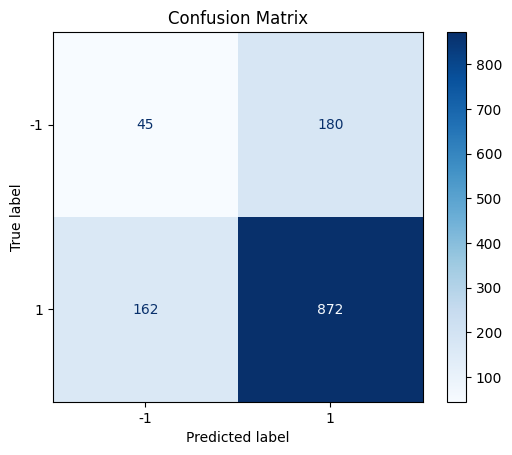

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels = model.classes_,
    cmap = plt.cm.Blues
)
disp.ax_.set_title('Confusion Matrix')
plt.show()

In [ ]:
print(f'Classification report is as below \n: {classification_report(y_test, y_pred)}')

Classification report is as below 
:               precision    recall  f1-score   support

          -1       0.22      0.20      0.21       225
           1       0.83      0.84      0.84      1034

    accuracy                           0.73      1259
   macro avg       0.52      0.52      0.52      1259
weighted avg       0.72      0.73      0.72      1259



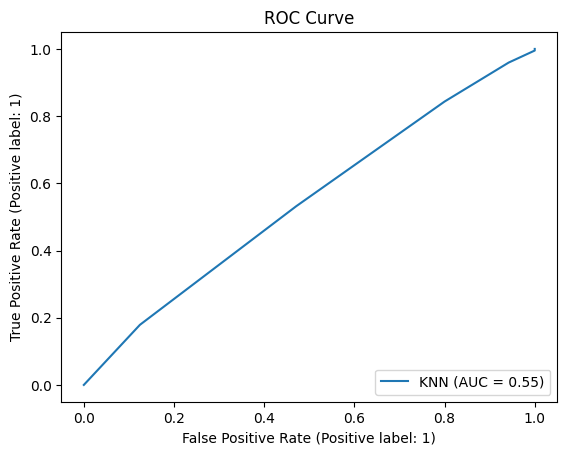

In [ ]:
from sklearn.metrics import RocCurveDisplay

disp_roc = RocCurveDisplay.from_estimator(
    model,
    X_test,
    y_test,
    name = 'KNN'
)
disp_roc.ax_.set_title('ROC Curve')
plt.show()

In [ ]:
tscv = TimeSeriesSplit(n_splits = 2, gap = 1)
for train, test in tscv.split(X):
  print (f'Size of train set is {train.shape}, size of test set is {test.shape}\n')

Size of train set is (2098,), size of test set is (2097,)

Size of train set is (4195,), size of test set is (2097,)



In [ ]:
model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('classifier', KNeighborsClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'classifier': KNeighborsClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 5,
 'classifier__p': 2,
 'classifier__weights': 'uniform'}

In [ ]:


# Perform Gridsearch and fit
param_grid = {"classifier__n_neighbors": np.arange(1,51,1)}

grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', n_jobs=-1, cv=tscv, verbose=1)
grid_search.fit(X_train, y_train)

# Optimal params & scores:
print(f"Optimal Neighbours: {grid_search.best_params_['classifier__n_neighbors']}, Best Scors: {round(grid_search.best_score_,4)}")

Fitting 2 folds for each of 50 candidates, totalling 100 fits
Optimal Neighbours: 36, Best Scors: 0.5473


In [ ]:
# Now we've identified the 'best' model, let's use it to make predictions:

clf = KNeighborsClassifier(n_neighbors = grid_search.best_params_['classifier__n_neighbors'])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

acc_train = accuracy_score(y_train, clf.predict(X_train))
acc_test = accuracy_score(y_test, y_pred)

print(f'\n Training Accuracy \t: {acc_train :0.4} \n Test Accuracy \t\t: {acc_test :0.4}')


 Training Accuracy 	: 0.7402 
 Test Accuracy 		: 0.8094


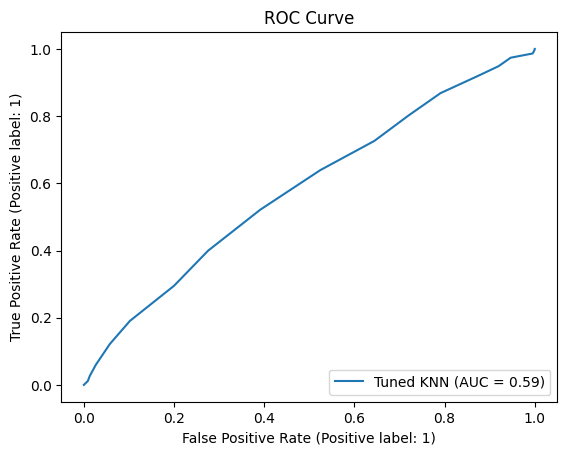

In [ ]:
disp_roc = RocCurveDisplay.from_estimator(
      clf, X_test, y_test, name = 'Tuned KNN'
)

disp_roc.ax_.set_title('ROC Curve')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.31      0.05      0.09       225
           1       0.83      0.97      0.89      1034

    accuracy                           0.81      1259
   macro avg       0.57      0.51      0.49      1259
weighted avg       0.73      0.81      0.75      1259



In [ ]:
# Now build a trading strategy on this:

df1 = df.copy()
df1['Signal'] = clf.predict(X)
df1['Returns'] = np.log(df1['Adj Close']).diff().fillna(0)
df1['Strategy'] = df1['Returns'] * df1['Signal'].shift(1).fillna(0)

# this bit is needed for pyfolio
df1.index = df1.index.tz_localize('utc')

df1.tail(10)

,Open,High,Low,Close,Adj Close,Volume,O-C,H-L,Signal,Returns,Strategy
Date,,,,,,,,,,,
2021-04-26 00:00:00+00:00,417.440002,418.220001,416.809998,417.609985,417.609985,52182400,-0.169983,1.410004,1,0.002085,0.002085
2021-04-27 00:00:00+00:00,417.929993,418.140015,416.299988,417.519989,417.519989,51303100,0.410004,1.840027,1,-0.000216,-0.000216
2021-04-28 00:00:00+00:00,417.809998,419.010010,416.899994,417.399994,417.399994,51238900,0.410004,2.110016,1,-0.000287,-0.000287
2021-04-29 00:00:00+00:00,420.320007,420.720001,416.440002,420.059998,420.059998,78544300,0.260010,4.279999,1,0.006353,0.006353
2021-04-30 00:00:00+00:00,417.630005,418.540009,416.339996,417.299988,417.299988,85448400,0.330017,2.200012,1,-0.006592,-0.006592
2021-05-03 00:00:00+00:00,419.429993,419.839996,417.670013,418.200012,418.200012,68128300,1.229980,2.169983,1,0.002154,0.002154
2021-05-04 00:00:00+00:00,416.070007,416.600006,411.670013,415.619995,415.619995,101591200,0.450012,4.929993,1,-0.006188,-0.006188
2021-05-05 00:00:00+00:00,417.380005,417.630005,415.149994,415.750000,415.750000,39960700,1.630005,2.480011,1,0.000313,0.000313
2021-05-06 00:00:00+00:00,415.829987,419.209991,413.679993,419.070007,419.070007,74321400,-3.240021,5.529999,1,0.007954,0.007954


In [ ]:
%pip install pyfolio
import pyfolio as pf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.8 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88663 sha256=30f6ac2302082f5043388e6c1008a72da12e1e4849d17dd56342cfeb83b312ca
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39762 sha256=1fbd8b25821c8e6370b5004faa7bdf630ac6242699a5a47830c6f60944630ae2
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


In [ ]:
pf.create_returns_tear_sheet(df1['Strategy'], live_start_date = '2016-04-07')

AttributeError: ignored